In [1]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import csv
import matplotlib.pyplot as plt

# keras imports
import keras
from keras import backend as K
backend_keras = keras.backend.backend()
print("keras is using", backend_keras,"as the backend")

# import a whole bunch of other packeges
import matplotlib
matplotlib.use("Agg")

from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import keras
import pickle
import cv2
import os

Using TensorFlow backend.


keras is using tensorflow as the backend


In [6]:
def show_image(arr):
    two_d = (np.reshape(arr, (28,28))*255).astype(np.uint8)
    plt.imshow(two_d, cmap='Greys', interpolation='nearest')
    plt.show()

train_images = np.load("../train_images.npy")


Transform and normalize images??

In [8]:
# load the training labels into a dictionary,
# also load it into a list, haven't decided which one is better yet
labels_dic = {}
labels = []
with open('../train_labels.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        try: 
            labels_dic[int(row[0])] = int(row[1])
            labels.append(int(row[1]))
        except: print(row)
            
len(labels_dic)

['ID', 'label']


50000

In [9]:
# normalize images
train_images = np.array(train_images, dtype="float") / 255.0

labels = np.array(labels)
train_labels = []
for i in labels:
    label = np.zeros(10)
    label[i]=1
    train_labels.append(label)

train_labels = np.array(train_labels)

In [10]:
print(labels.shape,train_images.shape)

(50000,) (50000, 28, 28)


In [11]:
# flatten and train
train_images_flatten = np.array([i.flatten("C") for i in train_images])
train_images_flatten.shape

(50000, 784)

## Creating keras model

following this guid
https://medium.com/@pallawi.ds/ai-starter-train-and-test-your-first-neural-network-classifier-in-keras-from-scratch-b6a5f3b3ebc4

In [16]:
# define the 784-350-200-10 architecture using keras
model = Sequential()
# we construct our nn architecture - a feedforward nn

# our input layer has 28 x 28 x 1 = 784 raw pixels
model.add(Dense(350, input_shape=(784,), activation="sigmoid"))
model.add(Dense(200, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

print("printing summary of model")
model.summary()

printing summary of model
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 350)               274750    
_________________________________________________________________
dense_4 (Dense)              (None, 200)               70200     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2010      
Total params: 346,960
Trainable params: 346,960
Non-trainable params: 0
_________________________________________________________________


### Compile the model

You can compile a network (model) as many times as you want. You need to compile the model if you wish to change the loss function, optimizer or matrices.

You need a compiled model to train (because training uses the loss function and the optimizer). But it’s not necessary to compile the model when testing the model on a new data.

In [17]:
# initialize our initial learning rate and # of epochs to train for
INIT_LR = 0.01
EPOCHS = 100

# compile the model using SGD as our optimizer and categorical
# cross-entropy loss (if you only have two classes use binary =_crossentropy)

print("[INFO] training network...")
opt = SGD(lr=INIT_LR) # stochastic gradient descent
model.compile(loss="categorical_crossentropy", optimizer=opt, 
              metrics=["accuracy"])



[INFO] training network...


In [18]:
# split the train into a train and valid set
ratio = 0.8
cut = int(ratio*len(train_images_flatten))
trainX = train_images_flatten[:cut]
trainY = train_labels[:cut]
valX = train_images_flatten[cut:]
valY = train_labels[cut:]

In [19]:
# train the neural network
H = model.fit(trainX, trainY, 
              validation_data=(valX, valY), 
              epochs=EPOCHS, batch_size=32)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 6s 148us/step - loss: 2.2317 - accuracy: 0.2357 - val_loss: 2.1286 - val_accuracy: 0.4461
Epoch 2/100
40000/40000 [==============================] - 5s 134us/step - loss: 1.9272 - accuracy: 0.4338 - val_loss: 1.7091 - val_accuracy: 0.4968
Epoch 3/100
40000/40000 [==============================] - 5s 118us/step - loss: 1.5422 - accuracy: 0.5545 - val_loss: 1.4048 - val_accuracy: 0.5569
Epoch 4/100
40000/40000 [==============================] - 5s 135us/step - loss: 1.2943 - accuracy: 0.6104 - val_loss: 1.2008 - val_accuracy: 0.6272
Epoch 5/100
40000/40000 [==============================] - 6s 154us/step - loss: 1.1287 - accuracy: 0.6448 - val_loss: 1.0661 - val_accuracy: 0.6516
Epoch 6/100
40000/40000 [==============================] - 7s 181us/step - loss: 1.0186 - accuracy: 0.6643 - val_loss: 0.9744 - val_accuracy: 0.6725
Epoch 7/100
40000/40000 [==============================]

40000/40000 [==============================] - 5s 129us/step - loss: 0.5594 - accuracy: 0.7982 - val_loss: 0.5897 - val_accuracy: 0.7762
Epoch 56/100
40000/40000 [==============================] - 5s 129us/step - loss: 0.5579 - accuracy: 0.7966 - val_loss: 0.5886 - val_accuracy: 0.7775
Epoch 57/100
40000/40000 [==============================] - 5s 129us/step - loss: 0.5563 - accuracy: 0.7990 - val_loss: 0.5855 - val_accuracy: 0.7811
Epoch 58/100
40000/40000 [==============================] - 5s 130us/step - loss: 0.5546 - accuracy: 0.7997 - val_loss: 0.5797 - val_accuracy: 0.7820
Epoch 59/100
40000/40000 [==============================] - 5s 129us/step - loss: 0.5525 - accuracy: 0.7995 - val_loss: 0.5807 - val_accuracy: 0.7832
Epoch 60/100
40000/40000 [==============================] - 5s 130us/step - loss: 0.5512 - accuracy: 0.7996 - val_loss: 0.5837 - val_accuracy: 0.7819
Epoch 61/100
40000/40000 [==============================] - 5s 130us/step - loss: 0.5495 - accuracy: 0.8012 - val

[INFO] evaluating network...


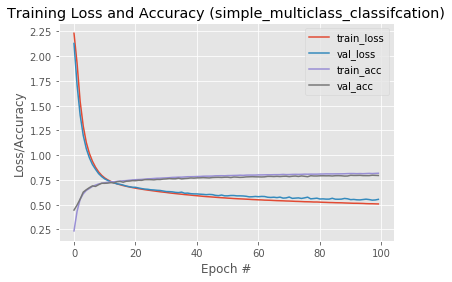

In [20]:
#evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(trainX, batch_size=32)

#Uncomment to see the predicted probabilty for each class in every test image
# print ("predictions---------------->",predictions)
#Uncomment to print the predicted labels in each image
# print("predictions.argmax(axis=1)",predictions.argmax(axis=1))

### print the performance report of the prediction
#print(classification_report(valY.argmax(axis=1),
 #                           predictions.argmax(axis=1), 
  #                          target_names=[str(i) for i in range(10)]))

# plot the training loss and accuracy for each epoch
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (simple_multiclass_classifcation)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("training_performance.png")

## save the model

In [22]:
# save the model to disk
print("[INFO] serializing network...")
model.save("keras_two_hidden_layer_784_350_200_10_795_valmodel.model")


[INFO] serializing network...
